<a href="https://colab.research.google.com/github/Salsep0/Projetos/blob/main/Social_Media_Addiction_Among_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas necessárias e o DF

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/Students Social Media Addiction.csv')

# Pre processamento de dados

In [24]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [28]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Criando grupos para as idades

In [34]:
bins = [15, 20, 25, 30, 35]
labels = ['15-20', '21-25', '26-30', '31-35']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Categorizando as medias das horas de uso das midias socias

In [37]:
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimo (0-2h)', 'Moderado (2-4h)', 'Alto (4-6h)', 'Muito Alto (6-12h)', 'Extremo (12h+)']
df['Usage_group'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels, right=False)

Categorizando as horas dormidas

In [38]:
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Ruim (0-4h)','Normal(5-7h),','Bom (8,9h)','Exclente (9h+)']
df['Sleep_group'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=sleep_bins, labels= sleep_labels, right=False)

Analise dos Dados

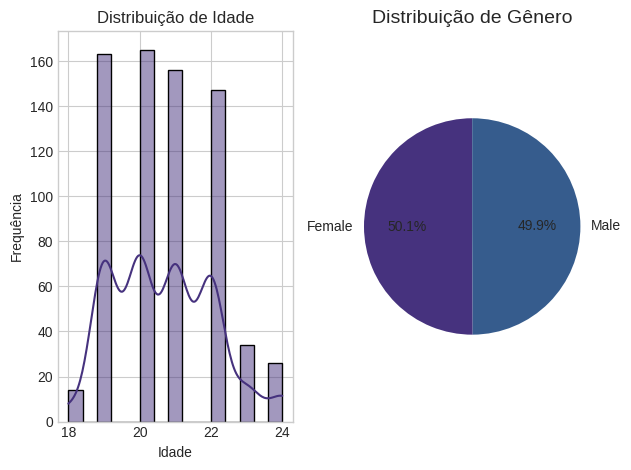

In [56]:
plt.figuresize = (16,6)

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Gênero', fontsize = 14)
plt.axis('equal')

plt.tight_layout()
plt.show()

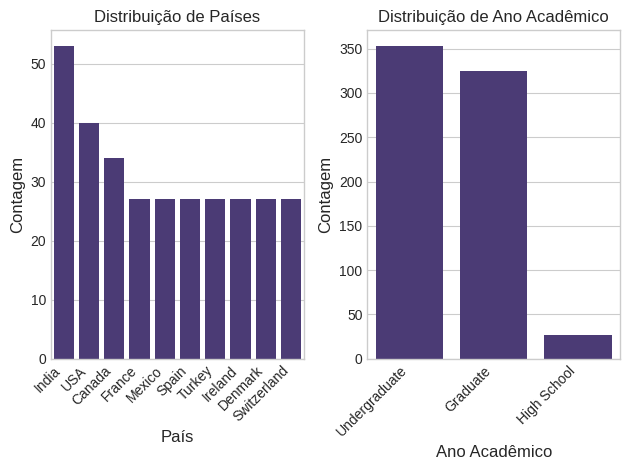

In [73]:
plt.figuresize = (16,6)

plt.subplot(1,2,1)
country_counts = df['Country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribuição de Países')
plt.xlabel('País', fontsize = 12)
plt.ylabel('Contagem', fontsize = 12)
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
academic_counts = df['Academic_Level'].value_counts()
sns.barplot(x=academic_counts.index, y=academic_counts.values)
plt.title('Distribuição de Ano Acadêmico')
plt.xlabel('Ano Acadêmico', fontsize = 12)
plt.ylabel('Contagem', fontsize = 12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()